
Eye Images

In [1]:
# Step 1: Import Necessary Libraries
# Same as before, we need TensorFlow for the model, NumPy for data handling,
# and Matplotlib for visualization.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.2


ICode for importing imgages from current folder structure

In [2]:
# --- Configuration ---
# Set the path to the main directory containing the image folders.
DATA_DIR = '/Users/aresbandebo/PycharmProjects/Eye_CNN_Testing/Dataset_Eye_Diseases_Classification/'
# Set the desired image dimensions for resizing.
IMG_HEIGHT = 224
IMG_WIDTH = 224

class_names = ["Cataract","Conjunctivitis","Eyelid","Normal","Uveitis"]
print(f"Found classes: {class_names}")
def load_data(data_dir):
    """
    Loads images and their corresponding labels from a directory.

    Args:
        data_dir (str): The path to the directory containing subdirectories
                        of images, where each subdirectory name is a class label.

    Returns:
        tuple: A tuple containing two lists:
               - images (list): A list of image data as numpy arrays.
               - labels (list): A list of corresponding string labels.
    """
    images = []
    labels = []

    # Get the class names (folder names)


    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)

        # Skip files that are not directories
        if not os.path.isdir(class_path):
            continue

        print(f"Loading images from: {class_name}")
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                # Read the image using OpenCV (which loads in BGR format)
                image_bgr = cv2.imread(image_path)

                # --- IMPORTANT COLOR CORRECTION ---
                # Matplotlib expects images in RGB format. We must convert from BGR to RGB.
                # Failure to do this will result in incorrect colors (the blueish tint).
                image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

                # Resize the image to a consistent size
                resized_image_rgb = cv2.resize(image_rgb, (IMG_WIDTH, IMG_HEIGHT))

                # Append the correctly colored, resized image and its label
                images.append(resized_image_rgb)
                labels.append(class_name)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    return images, labels

# --- Main script execution ---
if __name__ == "__main__":
    # 1. Validate the DATA_DIR path
    if DATA_DIR == 'path/to/your/dataset':
        print("="*50)
        print("ERROR: Please update the 'DATA_DIR' variable in the script.")
        print("You need to change the default value to the actual path of your dataset.")
        print("="*50)
    elif not os.path.exists(DATA_DIR):
        print("="*50)
        print(f"ERROR: The path specified in DATA_DIR does not exist.")
        print(f"Path provided: '{DATA_DIR}'")
        print(f"Current working directory is: '{os.getcwd()}'")
        print("Please double-check that the path is correct and the script has permission to access it.")
        print("="*50)
    elif not os.path.isdir(DATA_DIR):
        print("="*50)
        print(f"ERROR: The path specified in DATA_DIR is not a directory.")
        print(f"Path provided: '{DATA_DIR}'")
        print("Please ensure DATA_DIR points to the folder containing your class subfolders.")
        print("="*50)
    else:
        # 2. Load the images and labels
        images, labels = load_data(DATA_DIR)

        # 3. Convert lists to NumPy arrays
        images = np.array(images, dtype='float32')
        labels = np.array(labels)

        # 4. Normalize image data
        # Scale pixel values from [0, 255] to [0, 1]
        images /= 255.0

        # 5. Encode string labels to integers
        label_encoder = LabelEncoder()
        integer_labels = label_encoder.fit_transform(labels)

        # 6. One-hot encode the integer labels
        # This is necessary for categorical cross-entropy loss function
        num_classes = len(np.unique(integer_labels))
        categorical_labels = to_categorical(integer_labels, num_classes=num_classes)

        # 7. Split the data into training, validation, and testing sets
        # First, split into a temporary training set (80%) and a testing set (20%)
        (X_train_temp, X_test, y_train_temp, y_test) = train_test_split(
            images, categorical_labels, test_size=0.20, stratify=categorical_labels, random_state=42
        )

        # Now, split the temporary training set into the final training set (75% of 80% = 60%)
        # and a validation set (25% of 80% = 20%)
        (X_train, X_val, y_train, y_val) = train_test_split(
            X_train_temp, y_train_temp, test_size=0.25, stratify=y_train_temp, random_state=42
        )

        # --- Output the results ---
        print("\n--- Data Preprocessing Summary ---")
        print(f"Total images loaded: {len(images)}")
        print(f"Number of classes: {num_classes}")
        print(f"Shape of training data (images): {X_train.shape}")
        print(f"Shape of training data (labels): {y_train.shape}")
        print(f"Shape of validation data (images): {X_val.shape}")
        print(f"Shape of validation data (labels): {y_val.shape}")
        print(f"Shape of testing data (images): {X_test.shape}")
        print(f"Shape of testing data (labels): {y_test.shape}")
        print("\nOriginal Labels:", label_encoder.classes_)
        print("Encoded Labels Mapping:")
        for i, class_name in enumerate(label_encoder.classes_):
            print(f"  {class_name} -> {i}")

        print("\nData is now ready for training a CNN!")

Found classes: ['Cataract', 'Conjunctivitis', 'Eyelid', 'Normal', 'Uveitis']
Loading images from: Cataract
Loading images from: Conjunctivitis
Loading images from: Eyelid
Loading images from: Normal
Loading images from: Uveitis

--- Data Preprocessing Summary ---
Total images loaded: 2282
Number of classes: 5
Shape of training data (images): (1368, 224, 224, 3)
Shape of training data (labels): (1368, 5)
Shape of validation data (images): (457, 224, 224, 3)
Shape of validation data (labels): (457, 5)
Shape of testing data (images): (457, 224, 224, 3)
Shape of testing data (labels): (457, 5)

Original Labels: ['Cataract' 'Conjunctivitis' 'Eyelid' 'Normal' 'Uveitis']
Encoded Labels Mapping:
  Cataract -> 0
  Conjunctivitis -> 1
  Eyelid -> 2
  Normal -> 3
  Uveitis -> 4

Data is now ready for training a CNN!



--- Data Verification ---
Training set:   1368 samples (59.95%)
Validation set: 457 samples (20.03%)
Test set:       457 samples (20.03%)

Displaying a sample of training images...


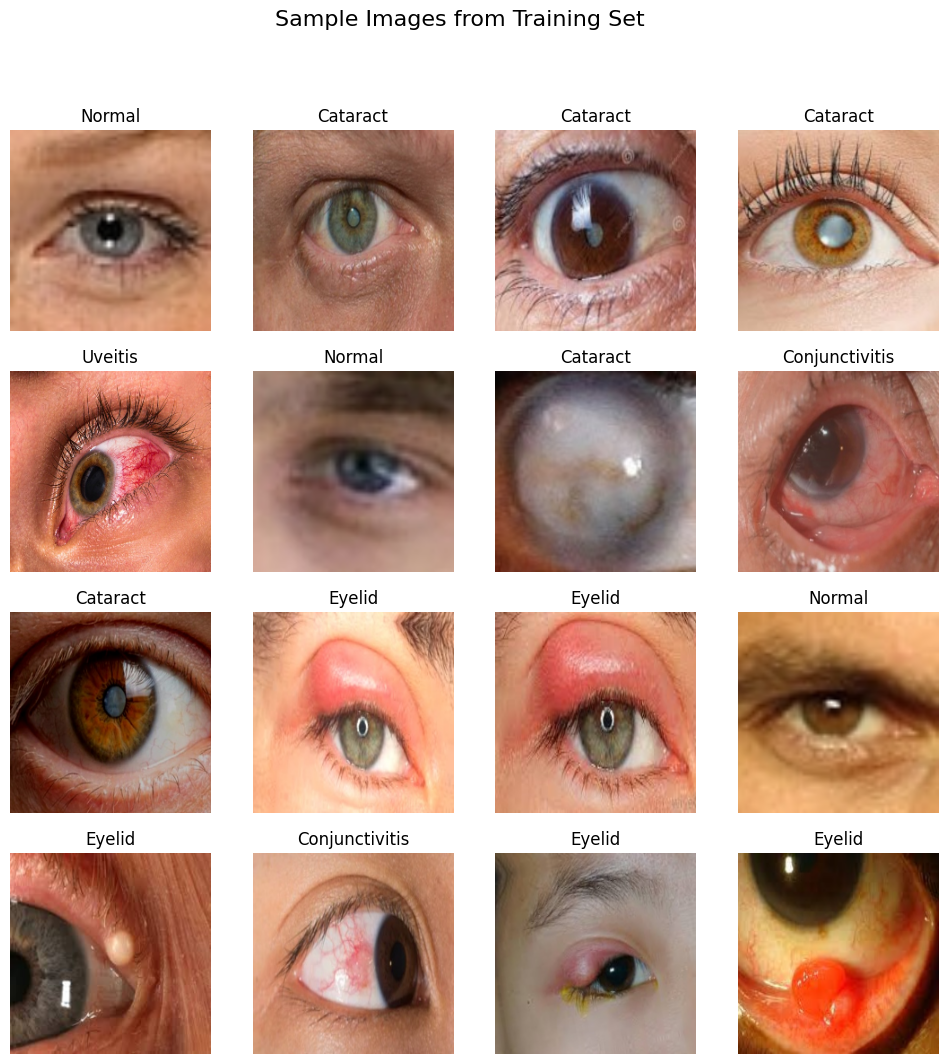

In [3]:
# --- 8. Verify the data ---
print("\n--- Data Verification ---")
total_samples = len(images)
print(f"Training set:   {len(X_train)} samples ({len(X_train)/total_samples:.2%})")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/total_samples:.2%})")
print(f"Test set:       {len(X_test)} samples ({len(X_test)/total_samples:.2%})")

# Function to display sample images
def show_sample_images(sample_images, sample_labels, class_names_map):
    plt.figure(figsize=(12, 12))
    for i in range(min(16, len(sample_images))): # Show up to 16 images
        plt.subplot(4, 4, i + 1)
        plt.imshow(sample_images[i])
        # Convert one-hot encoded label back to integer, then to class name
        label_index = np.argmax(sample_labels[i])
        plt.title(class_names_map[label_index])
        plt.axis("off")
    plt.suptitle("Sample Images from Training Set", fontsize=16)
    plt.show()

# Display some images from the training set to verify
print("\nDisplaying a sample of training images...")
show_sample_images(X_train, y_train, label_encoder.classes_)

In [4]:
# Step 4: Build the Convolutional Neural Network (CNN) Model
# The model architecture is very similar to the one we used for Fashion MNIST.
# The key difference is the `input_shape`. We now specify (32, 32, 3) to
# account for the 32x32 pixel size and 3 color channels.

model = models.Sequential()
# Layer 1: Convolutional layer. 32 filters, 3x3 kernel size.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
# Layer 2: Pooling layer.
model.add(layers.MaxPooling2D((2, 2)))
# Layer 3: Another Convolutional layer. We increase filters to 64.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Layer 4: Another Pooling layer.
model.add(layers.MaxPooling2D((2, 2)))
# Layer 5: A final Convolutional layer.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Now, let's add the final Dense (fully connected) layers for classification.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes)) # Output layer with 5 neurons for our 5 classes

# Let's see the model summary.
model.summary()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,293 (42.47 MB)

 Trainable params: 11,132,293 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 5: Compile the Model
# We configure the model for training.

model.compile(optimizer='adam',
              # For this loss function, it's good practice to set from_logits=True
              # because our model's output layer doesn't have a softmax activation function.
              # This can sometimes be more numerically stable.
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [7]:
# Step 6: Train the Model
# We'll train for 10 epochs, just like before. Training on CIFAR-10 will take
# a bit longer than on Fashion MNIST because the images are more complex.

print("\nStarting model training...")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))
print("Model training finished.")




Starting model training...
Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - accuracy: 0.3664 - loss: 1.4882 - val_accuracy: 0.5470 - val_loss: 1.1634
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 404ms/step - accuracy: 0.6196 - loss: 1.0435 - val_accuracy: 0.6805 - val_loss: 0.8744
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 341ms/step - accuracy: 0.7440 - loss: 0.6647 - val_accuracy: 0.7396 - val_loss: 0.7843
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 359ms/step - accuracy: 0.7742 - loss: 0.5947 - val_accuracy: 0.7615 - val_loss: 0.7226
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 413ms/step - accuracy: 0.8480 - loss: 0.4469 - val_accuracy: 0.7790 - val_loss: 0.7046
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 352ms/step - accuracy: 0.9087 - loss: 0.2884 - val_accuracy: 0.8206 - val_loss: 0.6349
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 351ms/step - accuracy: 0.9435 - loss: 0.1784 - val_accuracy: 0.8118 - val_loss: 0.7127
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 350ms/step - accuracy: 0.96

In [8]:
# Step 7: Evaluate the Model
# Let's check the final performance on the test set.

print("\nEvaluating model on the test dataset...")
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')
# Note: Getting around 70% accuracy on CIFAR-10 with a simple model like this is a good result!




Evaluating model on the test dataset...
15/15 - 2s - 137ms/step - accuracy: 0.8184 - loss: 0.9482

Test accuracy: 0.8184
Test loss: 0.9482


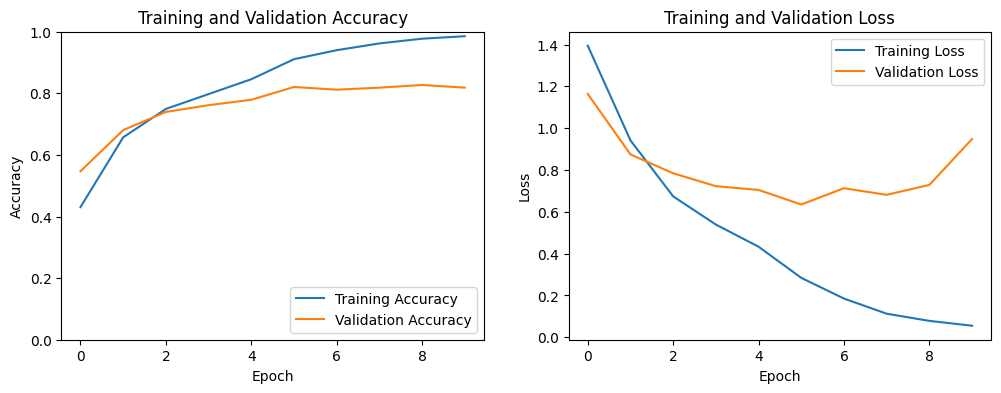

In [9]:
# Step 8: Visualize Training Results
# Plotting the history helps us understand the training process.

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()



15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
[[3.00746215e-05 7.19098025e-04 4.45288755e-02 1.23268062e-10
  9.54721987e-01]
 [1.25022620e-01 3.44745416e-07 2.63968686e-04 8.74708831e-01
  4.12220243e-06]
 [6.08245954e-02 8.75139415e-01 2.75886077e-02 2.31409795e-04
  3.62159833e-02]
 ...
 [9.99704719e-01 3.33976141e-06 2.69165525e-04 7.95804772e-06
  1.48668805e-05]
 [4.25679063e-05 3.17534129e-03 1.19025237e-03 1.73790049e-05
  9.95574474e-01]
 [3.77877027e-01 9.45024076e-04 1.01016834e-02 6.04399145e-01
  6.67713629e-03]]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
['Cataract', 'Conjunctivitis', 'Eyelid', 'Normal', 'Uveitis']
['Cataract', 'Conjunctivitis', 'Eyelid', 'Normal', 'Uveitis']
['Cataract', 'Conjunctivitis', 'Eyelid', 'Normal', 'Uveitis']
['Cataract', 'Conjunctivitis', 'Eyelid', 'Normal', 'Uveitis']
['Cataract', 'Conjunctivitis', 'Eyelid', 'Normal', 'Uveitis']
['Cataract', 'Conjunctivitis', 'Eyelid', 'Normal',

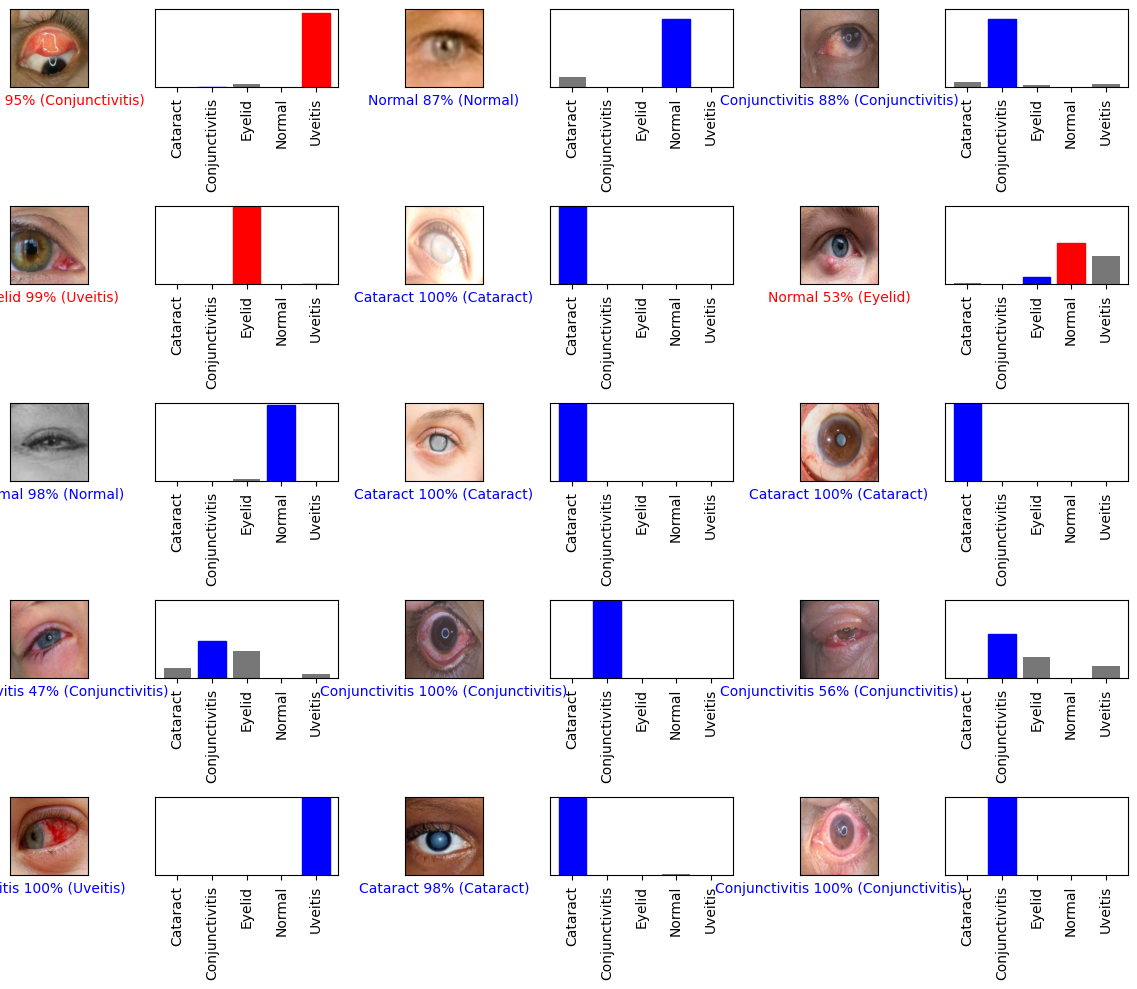

In [10]:
# Assume probability_model, predictions, X_test, y_test are already defined.
# And assume class_names is defined, for example:
# class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# --- CORRECTED CODE ---
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
print(predictions)
print(y_test)
# FIX: Add class_names as a parameter to the function
def plot_image_refactored(predictions_array, true_label, img, class_names):
  # No changes needed here if you were using np.argmax(true_label)
  # If true_label is just an integer, use int(true_label)
  try:
    true_label = np.argmax(true_label)
  except (ValueError, TypeError):
    true_label = int(true_label)

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# FIX: Add class_names as a parameter here as well
def plot_value_array_refactored(predictions_array, true_label, class_names):
  num_classes = len(class_names)

  try:
    true_label = np.argmax(true_label)
  except (ValueError, TypeError):
    true_label = int(true_label)

  plt.grid(False)
  plt.xticks(range(num_classes), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(num_classes), predictions_array, color="#777777")
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# The plotting loop
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # FIX: Pass class_names when you call the function
  plot_image_refactored(predictions[i], y_test[i], X_test[i], class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  print(class_names)
  #plot_value_array_refactored(predictions[i], y_test[i], class_names)
  # FIX: Pass class_names here too
  plot_value_array_refactored(predictions[i], y_test[i], class_names)

plt.tight_layout()
plt.show()